In [4]:
from incremental_td import incremental_TD
import numpy as np
import time
import matplotlib.pyplot as plt

In [16]:
nrep = 1

# gen data from mech1
m, T, r = 200, 100, 10
sigma = 0.1
np.random.seed(5)
Ut, R = np.linalg.qr(np.random.normal(size = (m, r)))
Vt, R = np.linalg.qr(np.random.normal(size = (m, r)))
M_mean = Ut.dot(np.diag([r-i for i in range(r)])).dot(Vt.T)
Tensor = np.zeros((m, m, T))
for i in range(T):
	Tensor[:,:,i] = M_mean + np.random.normal(scale = sigma, size = (m, m))

# prepare starting points for DTA and TD
# reset r here
r = 5
Ut = Ut[:,:r]
Vt = Vt[:,:r]
Us, d, Vs = np.linalg.svd(Tensor[:,:,1])
Us = Us[:,:r]
Vs = Vs[:,:r]

In [30]:
#####################################################################
###   ITD   plot                                               ###
###   ITD                                                         ###
###   ITD                                                         ###
#####################################################################
nrep = 50

conv_rec = np.zeros((nrep, T))
U10 = np.zeros((m, r))
for s in range(r):
    U10[s,s] = 1


for rep in range(nrep):
	# regenerate data
	for i in range(T):
		Tensor[:,:,i] = M_mean + np.random.normal(scale = sigma, size = (m, m))
	
	# set starting point
	U, V = U10, U10
	s1 = s2 = np.ones(r)

	for i in range(T):
		s1, U, s2, V = incremental_TD(s1, U, s2, V, Tensor[:,:,i], i+1, tol=1e-7)
		temp1, temp, temp2 = np.linalg.svd(V.T @ Vt);
# r-1 eigenval
		conv_rec[rep, i] = np.sqrt(1 - temp[r-2] ** 2)


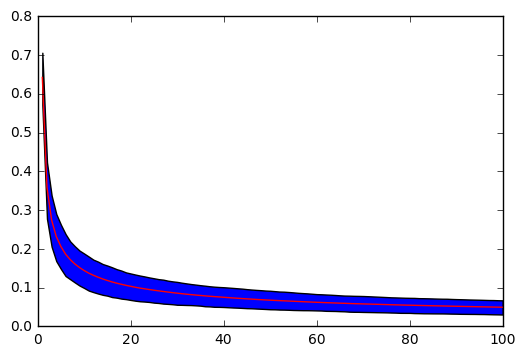

In [36]:
yplus = np.percentile(conv_rec, 90, 0)
yminus = np.percentile(conv_rec, 10, 0)
y = np.mean(conv_rec, axis = 0)
plt.plot(np.arange(1,T+1),y, color = "red")
plt.fill_between(np.arange(1,T+1), yminus, yplus)
plt.show()

In [32]:
np.arange(1,100)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])